## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse = pd.merge( mouse_metadata,study_results, how="outer", on=["Mouse ID"])

#mouse_study = pd.merge(study_results,mouse_metadata, how="outer", on=["Mouse ID"])
# Display the data table for preview
study_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
nofmice=study_results["Mouse ID"].nunique()
print("Number of mice: ",str(nofmice))

Number of mice:  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df1=study_mouse.loc[study_mouse.duplicated(subset=['Timepoint',"Mouse ID"])]
df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df3=study_mouse.loc[study_mouse["Mouse ID"]==df1["Mouse ID"].iloc[0]]

df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
duplicate_mouse_id=df3["Mouse ID"].unique()
duplicate_mouse_id[0]


'g989'

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2=study_mouse.drop_duplicates(subset=['Mouse ID',"Timepoint"])
df2=df2.loc[df2["Mouse ID"]!=duplicate_mouse_id[0]]
df2=df2.reset_index(drop=True)
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
noofmice=df2["Mouse ID"].nunique()
print("Number of mice: ",str(noofmice))

Number of mice:  248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_1=df2.groupby("Drug Regimen")

drug_regimen=tumor_volume_1["Drug Regimen"].first()

tumor_volume_mean=tumor_volume_1["Tumor Volume (mm3)"].mean()



tumor_volume_median=tumor_volume_1["Tumor Volume (mm3)"].median()



tumor_volume_variance=tumor_volume_1["Tumor Volume (mm3)"].var()



tumor_volume_std=tumor_volume_1["Tumor Volume (mm3)"].std()



tumor_volume_sem=tumor_volume_1["Tumor Volume (mm3)"].sem()



 #Assemble the resulting series into a single summary dataframe.


tumor_summary={
    "Mean":tumor_volume_mean,
                "Median":tumor_volume_median,
                "Variance":tumor_volume_variance,
                "Standard Deviation":tumor_volume_std,
               "SEM":tumor_volume_sem,
              
    
}
tumor_summary=pd.DataFrame(tumor_summary)


tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary=df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
aggregate_summary       
                                                

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


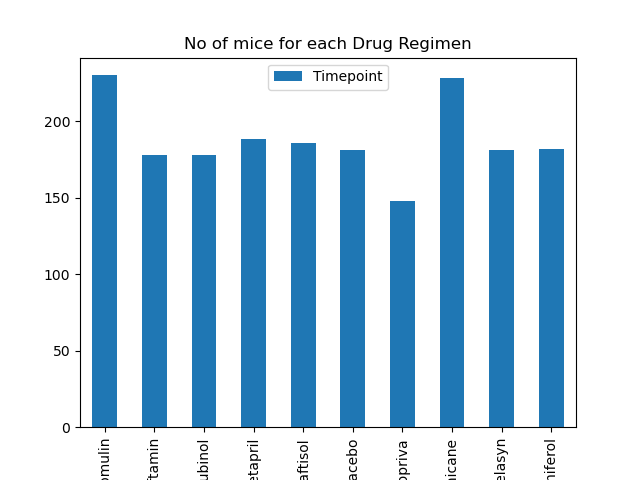

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.




timepoint_count=tumor_volume_1["Timepoint"].count()
timepoint_count=pd.DataFrame(timepoint_count)

timepoint_count.plot(kind="bar",title="No of mice for each Drug Regimen")
plt.show()

<IPython.core.display.Javascript object>


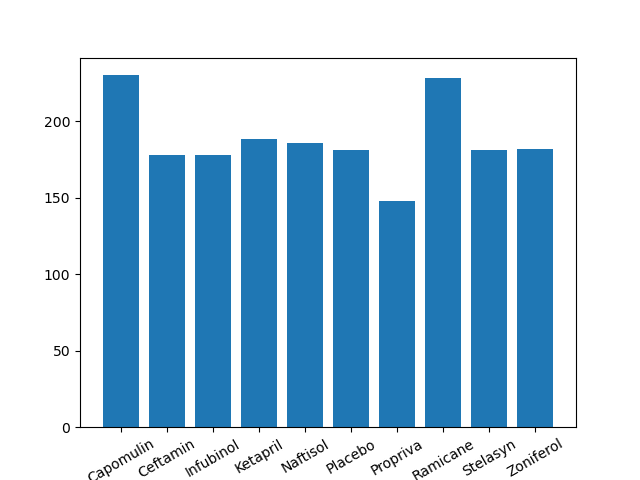

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_count=tumor_volume_1["Timepoint"].count()
drug_regimen=tumor_volume_1["Drug Regimen"].first()
plt.bar(drug_regimen,timepoint_count)
plt.xticks(rotation=30)
plt.show()


<IPython.core.display.Javascript object>


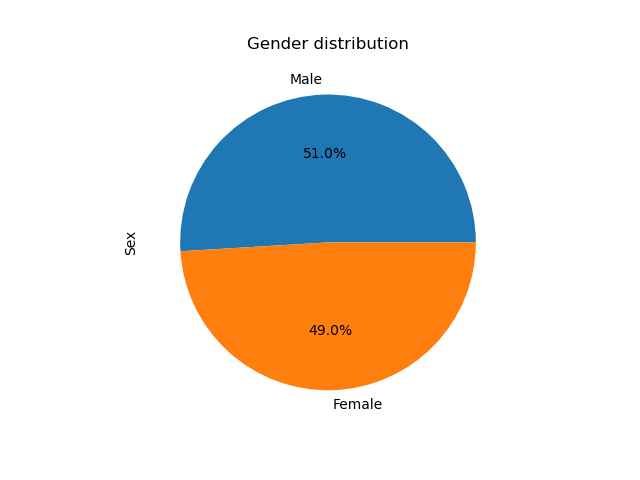

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_mice=df2["Sex"].value_counts()
pie_mice.plot(kind="pie", title="Gender distribution",autopct='%1.1f%%')
plt.show()

<IPython.core.display.Javascript object>


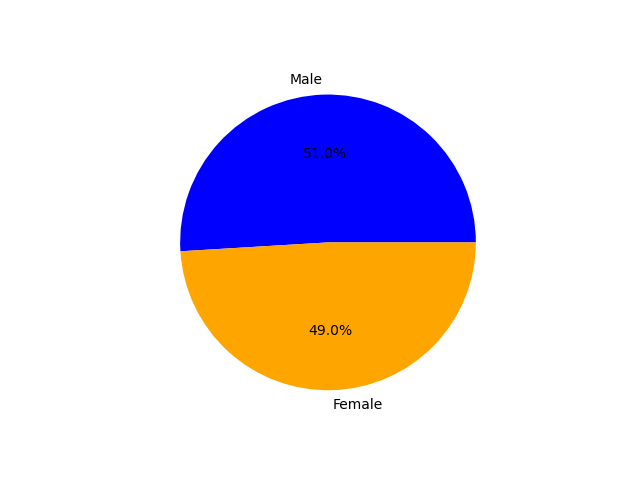

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=df2["Sex"].unique()

sizes=df2["Sex"].value_counts()
sizes
colors=["blue","orange"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df4=df2.set_index("Drug Regimen")
df4=df4.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],:]
df4=df4.sort_values("Mouse ID")
df4


# Start by getting the last (greatest) timepoint for each mouse
df4=df4.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df5=pd.DataFrame(df4)
df5=pd.merge(df2,df5,on=("Mouse ID","Timepoint"),how="right")
df5

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
capomulin=[]
ramicane=[]
infubinol=[]
ceftamin=[]

for index, row in df5.iterrows():
        if row["Drug Regimen"] == drug_treatments[0]:
            capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == drug_treatments[1]:
            ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == drug_treatments[2]:
            infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == drug_treatments[3]:
            ceftamin.append(row["Tumor Volume (mm3)"])
            
            
tumorr={
    "capomulin":capomulin,
    "ramicane":ramicane,
    "infubinol":infubinol,
    "ceftamin":ceftamin
}
tumorr=pd.DataFrame(tumorr)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
the_greatest_tumor_ever=[]
    
for drug in drug_treatments:
        the_greatest_tumor_ever=df2.loc[df2["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
        the_greatest_tumor_ever.append(the_greatest_tumor_ever)
        quartiles=the_greatest_tumor_ever.quantile([.25,.5,.75])
        lowerquartile=round(quartiles[.25],2)
        upperquartile = round(quartiles[.75],2)
        mean = the_greatest_tumor_ever.mean()
        iqr = round(upperq-lowerq,2)  

        print("Regimen:",drug)
        print("Lower quartile for",drug,"is:", lowerquartile)
        print("Upper quartile for" ,drug, "is:",upperquartile)
        print("Interquartile range for",drug, "is:",iqr)
        print("")
   
    

Regimen: Capomulin
Lower quartile for Capomulin is: 37.69
Upper quartile for Capomulin is: 45.0
Interquartile range for Capomulin is: 9.59

Regimen: Ramicane
Lower quartile for Ramicane is: 36.67
Upper quartile for Ramicane is: 45.0
Interquartile range for Ramicane is: 9.59

Regimen: Infubinol
Lower quartile for Infubinol is: 47.31
Upper quartile for Infubinol is: 57.31
Interquartile range for Infubinol is: 9.59

Regimen: Ceftamin
Lower quartile for Ceftamin is: 47.21
Upper quartile for Ceftamin is: 56.8
Interquartile range for Ceftamin is: 9.59



C:\Users\kazek\AppData\Local\Temp\ipykernel_21096\4245865073.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_greatest_tumor_ever.append(the_greatest_tumor_ever)
C:\Users\kazek\AppData\Local\Temp\ipykernel_21096\4245865073.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_greatest_tumor_ever.append(the_greatest_tumor_ever)
C:\Users\kazek\AppData\Local\Temp\ipykernel_21096\4245865073.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_greatest_tumor_ever.append(the_greatest_tumor_ever)
C:\Users\kazek\AppData\Local\Temp\ipykernel_21096\4245865073.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_greatest_tum

<IPython.core.display.Javascript object>


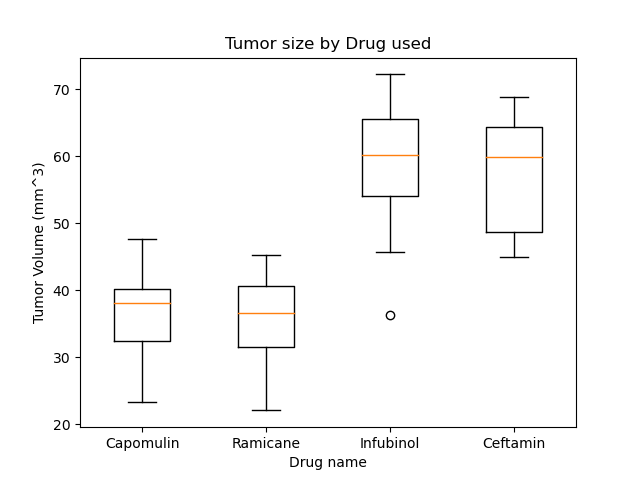

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxx = [tumorr["capomulin"],
                tumorr["ramicane"],
                tumorr["infubinol"],
                tumorr["ceftamin"]
               ]

fig, ax = plt.subplots()
ax.boxplot(boxx, labels = drug_treatments)
ax.set_title('Tumor size by Drug used') 
ax.set_xlabel('Drug name') 
ax.set_ylabel('Tumor Volume (mm^3)') 
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


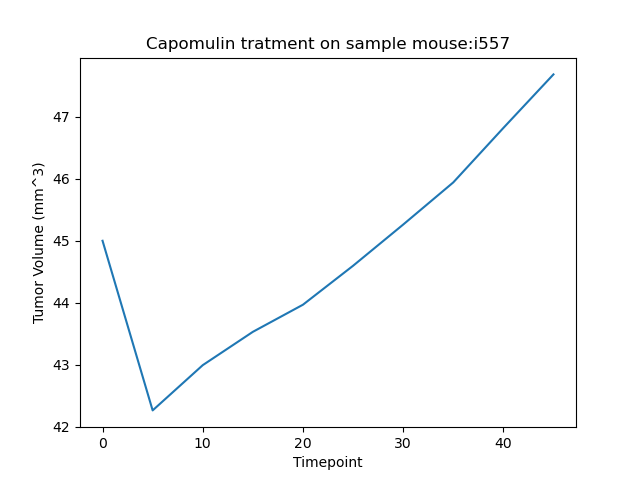

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_drug=df2.loc[df2["Drug Regimen"]=="Capomulin"]
mousesample=capo_drug["Mouse ID"].sample()
mousesample=pd.DataFrame(mousesample)
mousesample=mousesample.iloc[0,0]
mousesample

capo_drug=capo_drug.loc[df2["Mouse ID"]==mousesample]

x=capo_drug["Timepoint"]
y=capo_drug["Tumor Volume (mm3)"]
plt.plot(x,y)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm^3)")
plt.title("Capomulin tratment on sample mouse:"+mousesample)
plt.show()

<IPython.core.display.Javascript object>


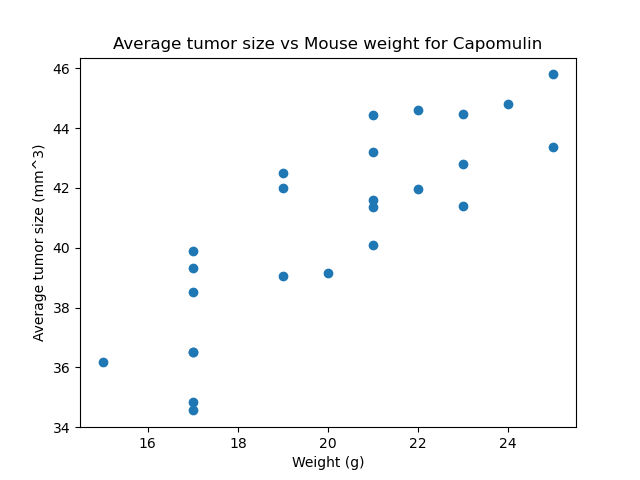

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_drug2=df2.loc[df2["Drug Regimen"]=="Capomulin"]
capo_ave=capo_drug2.groupby(["Mouse ID"]).mean()
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor size (mm^3)")
plt.title("Average tumor size vs Mouse weight for Capomulin")
x=capo_ave["Weight (g)"]
y=capo_ave["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.show()


## Correlation and Regression

<IPython.core.display.Javascript object>


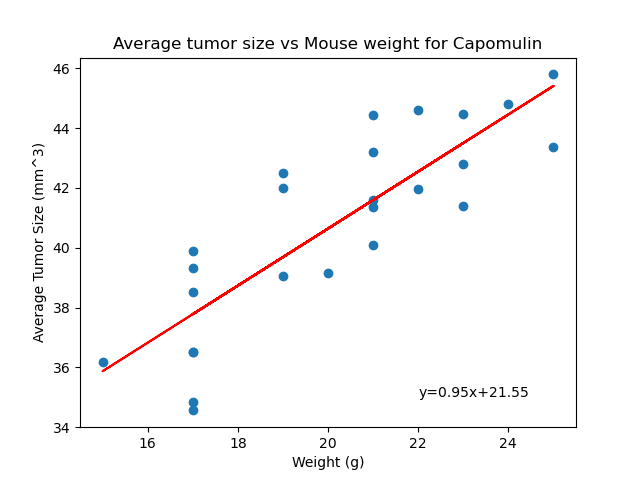

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope,intercept,rvalue,pvalue,stderr=st.linregress(x,y)
equation="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
regress=x*slope+intercept

plt.scatter (x,y)
plt.plot(x,regress, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm^3)")
plt.title("Average tumor size vs Mouse weight for Capomulin")
plt.annotate(equation,(22,35))
plt.show()